In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-gmres-restart)

The following experiments are based on a matrix resulting from discretization of a partial differential equation.

n = 2500

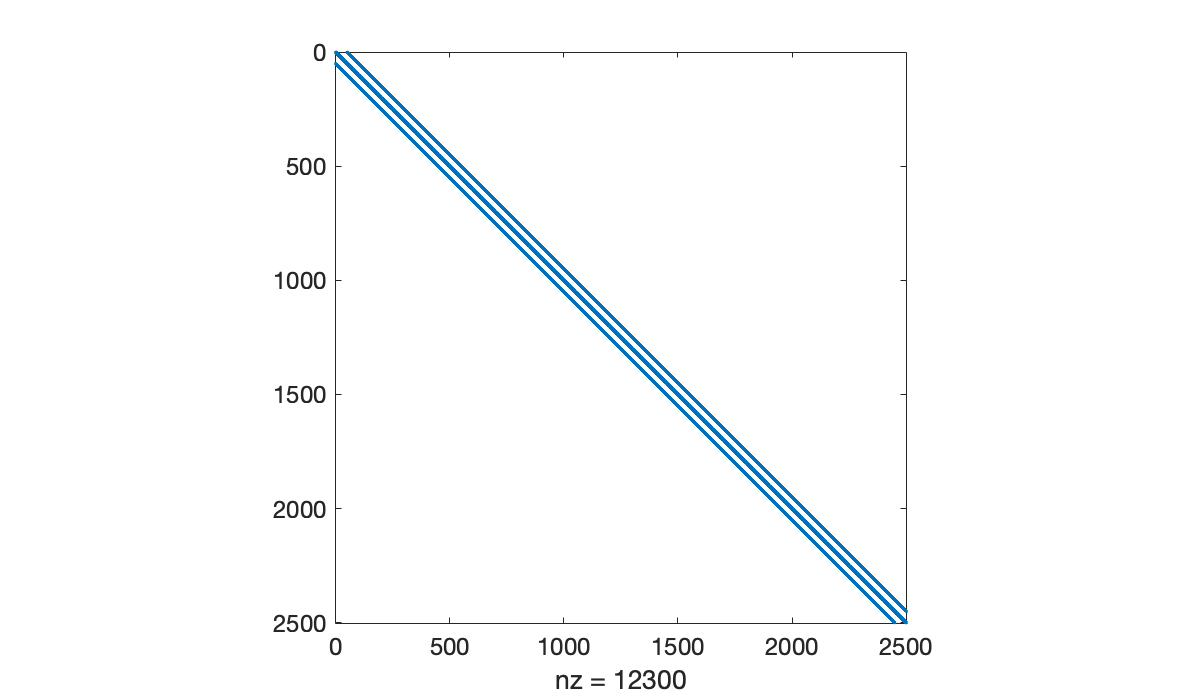

In [2]:
d = 50;
A = d^2 * gallery('poisson', d);
n = size(A, 1)
b = ones(n, 1);
clf,  spy(A)

```{index} ! MATLAB; gmres
```

We compare unrestarted GMRES with three different thresholds for restarting. Here we are using the built-in `gmres`, since our simple implementation does not offer restarting.

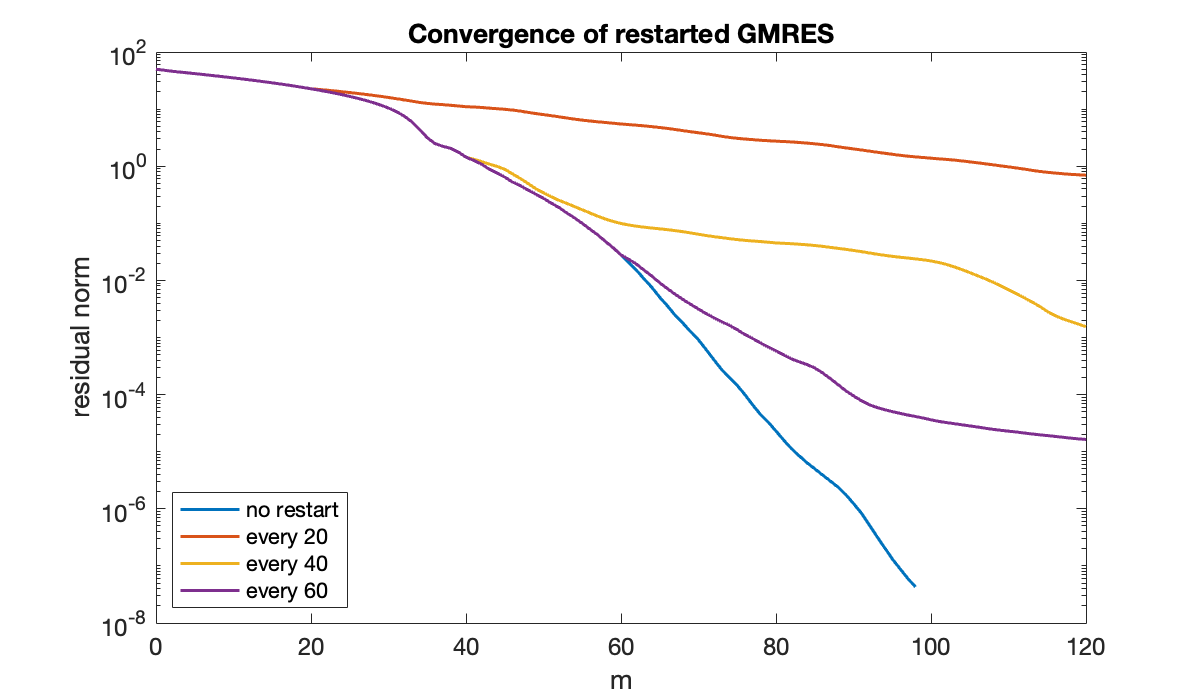

In [3]:
clf
restart = [120, 20, 40, 60];
for j = 1:4
    [~,~,~,~,rv] = gmres(A, b, restart(j), 1e-9,120 / restart(j));
    semilogy(0:length(rv) - 1, rv),  hold on
end
title('Convergence of restarted GMRES')
xlabel('m'),  ylabel('residual norm')
legend('no restart','every 20','every 40','every 60','location','southwest');

The "pure" GMRES curve is the lowest one. All of the other curves agree with it until the first restart. Decreasing the restart value makes the convergence per iteration generally worse, but the time required per iteration smaller as well.